# <u> Utilising Python for Analysis of the SARS-CoV-2 (COVID-19) Sequence. <u>

### SARS-CoV-2 (COVID-19) is a single standed RNA virus responsible for the world pandemic currently faced by mankind. Here, Python is used to demonstrate the utility of such coding langauges to further explore DNA sequences with real world applications.

<i>Firstly, it is important to ensure that the required packages and functions are installed and imported. This is done with the following lines of code: <i>

In [28]:
pip install Biopython

Note: you may need to restart the kernel to use updated packages.


In [29]:
pip install pandas

In [30]:
 pip install primer3-py

Note: you may need to restart the kernel to use updated packages.


In [31]:
from Bio import SeqIO

In [32]:
from Bio.SeqUtils import GC

In [33]:
from Bio.SeqRecord import SeqRecord

In [34]:
import pandas as pd

In [35]:
import primer3

In [36]:
from Bio.Blast import NCBIWWW

 <i> The complete genome assembly was obtained from https://www.nature.com/articles/s41586-020-2008-3 and is freely accessible from NCBI Sequence Read Archive database under the BioProject accession number PRJNA603194. The complete genome sequence of COVID19 in GenBank can be found under the accession number MN908947. <i>

In [37]:
for sequence in SeqIO.parse("MN908947.fna", "fasta"):
    print('GenBankId: '  + sequence.id + '\nSize: ' + str(len(sequence))+' nucleotides')

GenBankId: MN908947.3
Size: 29903 nucleotides


<i> This line of code takes a file type, in this case a fasta sequence, and reports the sequence back as a SeqRecord object which can be read by Biopython for further use. For example, the str(len(sequence)) function can be used to take a string as an argument, e.g. the COVID-19 sequence, and return its length. The output states that the sequence length for the genome assembly of COVID-19 is 29,903 nucleotide bases long. <i>

In [38]:
DNAseq = SeqIO.read("MN908947.fna", "fasta")

In [39]:
DNA = DNAseq.seq
print(DNA[:500])

ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTG


<i> This takes the COVID-19 sequence and creates an object called DNAseq which is read in as a SeqRecord object that can be recognised by Biopython. An object called DNA is then created from just the sequence of DNAseq. The first 500 nucleotides are then printed to view the sequence and ensure it has been read by the software correctly (29,903 nucleotides can be quite lengthy to read!). <i>

In [40]:
dna_list = list(DNA)

<i> The sequence loaded is initially read a string by Biopython, so in order to count the contents of the sequence assembly, the string must be converted into a list. This is done using the above function. <i>

<i> Counting of each respective nucleotide is undertaken using the following code: <i>

In [41]:
count_DNA = DNA
nucleotides={}
for n in count_DNA:
    if n in nucleotides:
        nucleotides[n] += 1
    else:
        nucleotides[n] =  1
print(nucleotides)


n_count = pd.DataFrame(data=nucleotides, index=[0]).T.reset_index()
n_count = n_count.rename(columns={0: 'frequency', 'index': 'nucleotides'})
n_count = n_count.sort_values(by=['frequency'], ascending=True)

{'A': 8954, 'T': 9594, 'G': 5863, 'C': 5492}


<i> A loop is set up to count each nucleotide base (A, T, G and C). When the computer reads either an A, T , G or C from the DNA list, a 1 is added to that specific nucleotide which has been created into a dictonary called nucleotides through the use of '{}'. This allows for a value to be mapped onto each nucleotide base. If the computer does not read that specific nuceleotide then a one is not added and the value remains unchanged. This is done seperately for each nucleotide base until all four have been counted and this is then printed onto the screen to be evaluated. The dictionary nucleotides is then placed into a dataframe to create the graph below. <i>

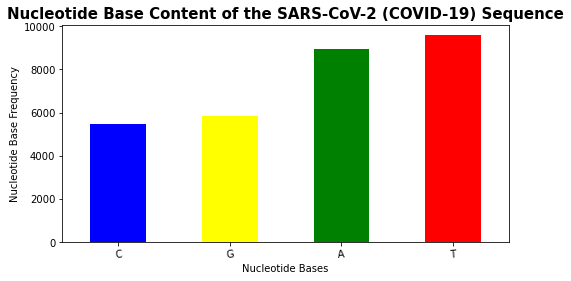

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
a= n_count['frequency'].plot.bar(color= ['blue', 'yellow', 'green', 'red'])
plt.xticks(rotation=5)
plt.ylabel("Nucleotide Base Frequency")
r=list(range(len(n_count)))
plt.xticks(r, n_count.nucleotides)
plt.xlabel("Nucleotide Bases")
plt.title("Nucleotide Base Content of the SARS-CoV-2 (COVID-19) Sequence", weight='bold', size=15)
plt.show()

<i> From the bar chart above, we can say that the %GC content of the SARS-CoV-2 (COVID-19) sequence is less than 50%. To get the percentage of the GC content, the below code can be used. The round function is used to round ther percentage to the nearest whole number. It is important to know the %GC content of a sequence as this is an important consideration for primer design in PCR experiments.  <i>

In [43]:
GC_COVID19=GC(DNA)
print ("The GC content of SARS-CoV-2 (COVID-19) is", round(GC_COVID19), "%") 

The GC content of SARS-CoV-2 (COVID-19) is 38 %


<i> In order to fully explore the SARS-CoV-2 (COVID-19) sequence, the cDNA sequence is converted into mRNA using the .transcribe() function. This will then allow for the mRNA to be translated into its respective amino acids and its protein sequence can be analysed. The first 200 nucleotide bases can then be printed to ensure this has been done correctly. <i>

In [44]:
mRNA = DNA.transcribe()

In [45]:
print(mRNA[:200])

AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGUAGAUCUGUUCUCUAAACGAACUUUAAAAUCUGUGUGGCUGUCACUCGGCUGCAUGCUUAGUGCACUCACGCAGUAUAAUUAAUAACUAAUUACUGUCGUUGACAGGACACGAGUAACUCGUCUAUCUUCUGCAGGCUGCUUACGGU


<i> The cDNA sequence for SARS-CoV-2 (COVID-19) has been correctly converted into mRNA as the thymine (T) base has been swapped for uracil (U) base. The first 200 bases have been printed. <i>

<i> One key disadvanatge of this code is that it does not know what kind of modifications are made either to generate mature mRNA or post-translational modifications made to the proteins. This is why when trying to translate the mRNA into its respctive amino acids, an error message occurs, as 29,903 is not a multiple of 3 which is required when translating mRNA into amino acids. <i>

<i> However we do know that the Poly(A) tail, which is located at that end of the mRNA sequence and is required for stability of the mRNA, is not translated into proteins, therefore we can remove this using the following line of code: <i>

In [46]:
Less_polyA = mRNA.rstrip("A")

In [47]:
print("Length of mRNA minus Poly A tail:",len(Less_polyA))

Length of mRNA minus Poly A tail: 29870


<i> This removes the poly(A) tails and then prints the number of nucleotide bases once the poly(A) tail has been removed. This results in 29,870 nucleotide bases remaining which is divisble by 3, and therefore no error messages occur when the mRNA sequence minus the poly(A) tail was translated into amino acids. <i>

In [49]:
Amino_Acid = Less_polyA.translate()

In [82]:
print("Length of Protein:",len(Amino_Acid))
print(Amino_Acid)

Length of Protein: 9956
IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER*DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS*RWHLWLSRS*KRRFAST*TALCVHQTFGCSNCTSWSCYG*AGSRTRRHSVRS*W*DTWCPCPSCGRNTSGLPQGSSS*ER**RSWWP*LRRRSKVI*LRRRAWH*SL*RFSRKLEH*T*QWCYP*THA*A*RRGIHSLCR*QLLWP*WLPS*VH*RPSSTCW*SFMHFVRTTGLY*H*EGCILLP*T*A*NCLVHGTF*KEL*IADTF*N*IGKEI*HLQWGMSKFCISLKFHNQDYSTKG*KEKA*WLYG*NSICLSSCVTK*MQPNVPFNSHEV*SLW*NFMADGRFC*SHLRILWH*EFD*RRCHYLWLLTPKCCC*NLLSSMSQFRSRT*A*SCRIP**IWLENHSS*GWSHYCLWRLCVLLCWLP*QVCLLGSTC*R*HRL*PYRCCWRRFRRS**QPS*NTPKRESQHQYCW*L*T**RDRHYFGIFFCFHKCFCGNCERFGL*SIQTNC*ILW*F*SYKRKS*KRCLEYW*TEINTESSLCICIRGCSCCTINFLPHS*NCSKFCACFTEGRYNNTRWNFTVFTETH*CYDVHI*FGY*QSSCNGLHYRWCCSVDFAVAN*HLWHCL*KTQTRP*LA*REV*GRCRVS*RRLGNC*IYLNLCL*NCRWTNCHLCKGN*GECSDIL*ACK*IFGFVC*LYHYWWS*T*SLEFR*NICHALKGIVQKVC*IQRRNWPTHASKSPKRNYLLRGRNTSHRSVNRGSCLENW*FTTIRTTY**SC*SSIGWYTSLY*RAYVARNQRHRKVLCPCT*YDGNKQYLHTQRRCTNKGYFW**HCDRSARLQECEYHF*T**KD**ST**EVLCLYS*TRYRSK*VRLCCGRCCHKNFATSI*

<i> The length of the translated mRNA into amino acids is printed along with the first 200 amino acids in the sequence to ensure that the translation has been done correctly. In order to identify the amino acid sequences for indivdual proteins, the amino acid sequence was split by the '*' which represents a stop codon for that specific protein sequence. This is shown in the line of code bewlow, the first 10 sequences are then printed. <i>

In [108]:
Proteins = Amino_Acid.split('*')
print(Proteins[:10])

[Seq('IKGLYLPR'), Seq('QTNQLSISCRSVL'), Seq('TNFKICVAVTRLHA'), Seq('CTHAV'), Seq('LITNYCR'), Seq('QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER'), Seq('DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS'), Seq('RWHLWLSRS'), Seq('KRRFAST'), Seq('TALCVHQTFGCSNCTSWSCYG')]


In [109]:
TotalProteins=pd.DataFrame(Proteins)
TotalProteins.describe()
print("Total Proteins:", len(TotalProteins))

Total Proteins: 775


<i> It is well known that the smallest functional proteins are no shorter than 20 amino acids in length, so all amino acid sequences shorter than this are removed and not included in further analysis. <i>

In [110]:
for i in Proteins[:]:
    if len(i) < 20:
        Proteins.remove(i)
print("Total Functional Proteins:", len(Proteins))

Total Functional Proteins: 80


<i> The resulting data can then be organised based on the user's preference and future applications. Here, two examples of collating the data obtained is illustrated, either by putting all the sequences into a collective dataframe or placing the sequences into separate files for further investigation. <i>

In [ ]:
proteinas=pd.DataFrame(Proteins)
proteinas['Amino Acid Sequence'] = proteinas[0].apply(str)
proteinas['Protein Length'] = proteinas[0].apply(len)
proteinas.rename(columns={0: "sequence"}, inplace=True)
pro=proteinas.drop('sequence', axis=1)
pro= pro.sort_values(by=['Protein Length'], ascending=False)

In [ ]:
pro.to_excel("Covid19_Protein_Sequence.xlsx")

<i> The preceding lines of code place the protein data intoa dataframe which can then be converted into an excel sheet for ease of use. Whilst the lines of code below place each peptide sequence into separate files.  <i>

In [53]:
for count, item in enumerate(Proteins, 1):
     with open(f'Peptide_{count}.fasta', 'w') as f:
        f.write("%s\n" % item)


In [111]:
from __future__ import division
poi_list = []
MW_list = []
from Bio.SeqUtils import ProtParam
for record in Proteins[:]:
    print("\n")
    X = ProtParam.ProteinAnalysis(str(record))
    POI = X.count_amino_acids()
    poi_list.append(POI)
    MW = X.molecular_weight()
    MW_list.append(MW)
    print("Protein of Interest = ", POI)
    print("Amino acids percent =    ",str(X.get_amino_acids_percent()))
    print("Molecular weight = ", MW_list)
    print("Aromaticity = ", X.aromaticity())
    print("Flexibility = ", X.flexibility())
    print("Isoelectric point = ", X.isoelectric_point())
    print("Secondary structure fraction = ",   X.secondary_structure_fraction())



Protein of Interest =  {'A': 0, 'C': 1, 'D': 1, 'E': 1, 'F': 2, 'G': 1, 'H': 0, 'I': 3, 'K': 0, 'L': 3, 'M': 0, 'N': 1, 'P': 2, 'Q': 2, 'R': 4, 'S': 7, 'T': 4, 'V': 3, 'W': 0, 'Y': 0}
Amino acids percent =     {'A': 0.0, 'C': 0.02857142857142857, 'D': 0.02857142857142857, 'E': 0.02857142857142857, 'F': 0.05714285714285714, 'G': 0.02857142857142857, 'H': 0.0, 'I': 0.08571428571428572, 'K': 0.0, 'L': 0.08571428571428572, 'M': 0.0, 'N': 0.02857142857142857, 'P': 0.05714285714285714, 'Q': 0.05714285714285714, 'R': 0.11428571428571428, 'S': 0.2, 'T': 0.11428571428571428, 'V': 0.08571428571428572, 'W': 0.0, 'Y': 0.0}
Molecular weight =  [3896.388]
Aromaticity =  0.05714285714285714
Flexibility =  [1.0254166666666666, 1.0115238095238097, 0.9737499999999999, 0.9758214285714286, 0.9602857142857143, 0.9736428571428574, 0.9377261904761905, 0.9531309523809526, 0.9757857142857143, 0.9605952380952383, 0.9992738095238096, 0.9844642857142858, 0.9694166666666666, 0.9892738095238094, 1.004392857142857

<BarContainer object of 20 artists>

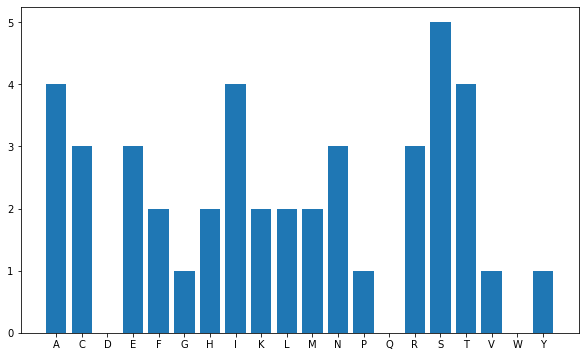

In [124]:
MolecularWeight=pd.DataFrame(data= MW_list,columns= ["Molecular Weights"])
ProteinsofInterest= poi_list[79]
plt.figure(figsize=(10,6));
plt.bar(ProteinsofInterest.keys(), list(ProteinsofInterest.values()), align='center')

In [94]:
fasta_string = open("Peptide_69.fasta").read()
result_handle = NCBIWWW.qblast(
"blastp",
"nr", 
fasta_string, hitlist_size=10,
)
save_file = open("pep69out.xml", "w")

save_file.write(result_handle.read())

save_file.close()

result_handle.close()

In [ ]:
print_full(pro)

<i> This collection of protein sequences can then be saved and placed in an excel sheet with the following code: <i>

**These sequences can now be matched with online databases (BLAST) to identify the proteins.**

To search each peptide each peptide needs to be writtten to a separate file 

In [ ]:
Primers=primer3.designPrimers(
    {
        "SEQUENCE_ID": "COVID-19",
        "SEQUENCE_TEMPLATE": str(DNA),
        "SEQUENCE_INCLUDED_REGION": [36,342]
    },
    {
        'PRIMER_OPT_SIZE': 20,
        'PRIMER_INTERNAL_MAX_SELF_END': 8,
        'PRIMER_MIN_SIZE': 18,
        'PRIMER_MAX_SIZE': 25,
        'PRIMER_OPT_TM': 60.0,
        'PRIMER_MIN_TM': 57.0,
        'PRIMER_MAX_TM': 63.0,
        'PRIMER_MIN_GC': 20.0,
        'PRIMER_MAX_GC': 80.0,
        'PRIMER_MAX_POLY_X': 100,
        'PRIMER_SALT_MONOVALENT': 50.0,
        'PRIMER_DNA_CONC': 50.0,
        'PRIMER_MAX_NS_ACCEPTED': 0,
        'PRIMER_MAX_SELF_ANY': 12,
        'PRIMER_MAX_SELF_END': 8,
        'PRIMER_PAIR_MAX_COMPL_ANY': 12,
        'PRIMER_PAIR_MAX_COMPL_END': 8,
        'PRIMER_PRODUCT_SIZE_RANGE': [[75,100],[100,125],[125,150],
                                      [150,175],[175,200],[200,225]],
    })

In [ ]:
Primer = pd.DataFrame(Primers)
Primer_Table=Primer[:1] #keep top 1
Primer_final= Primer_Table.transpose()

In [ ]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [ ]:
print_full(Primer_final)

In [ ]:
Primer_final.to_excel("Primers.xlsx")

primers_list is the one which prints all primers. 